In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# could later set global variables here
minutes = 300  # 5 hours
meters = 10000 # 10 km

minute_steps = 1
meter_steps = 200

sigma = 45
tau = 45

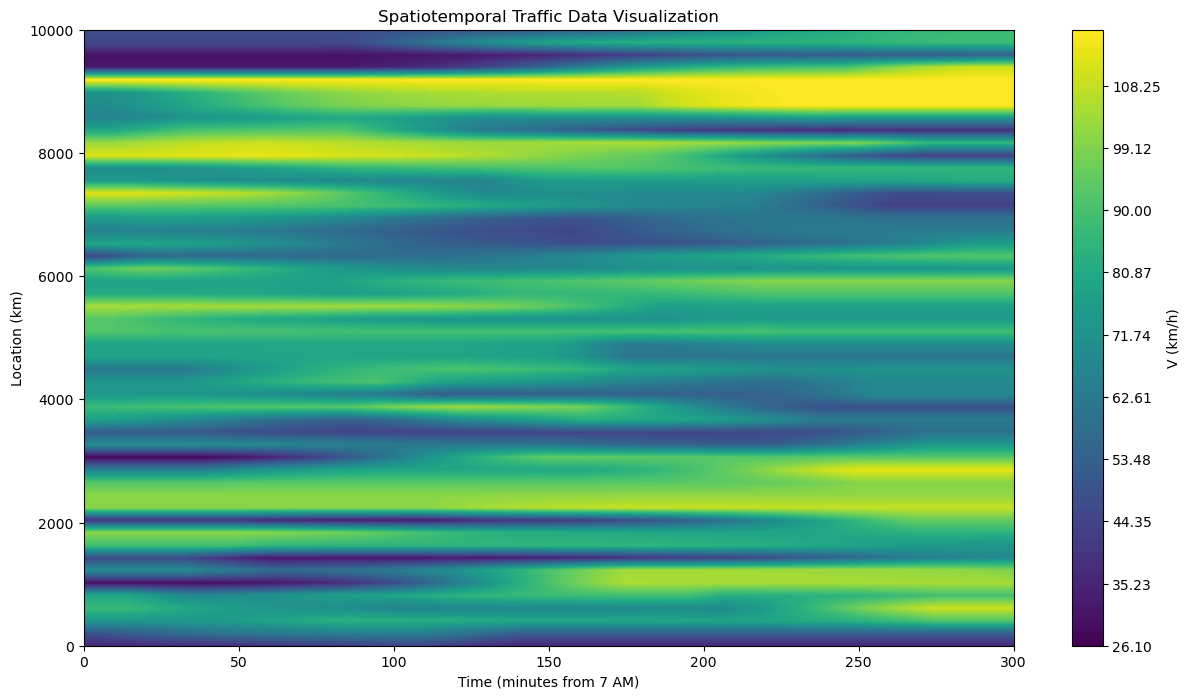

In [10]:
def phi_0(x, t, xi, ti, sigma, tau):
    return np.exp(- (np.abs(x - xi) / sigma + np.abs(t - ti) / tau))

def N(x, t, datapoints, sigma, tau):
    return sum(phi_0(x, t, xi, ti, sigma, tau) for xi, ti, _ in datapoints)

def V(x, t, datapoints, sigma, tau):
    normalization_factor = N(x, t, datapoints, sigma, tau)
    return sum(phi_0(x, t, xi, ti, sigma, tau) * vi for xi, ti, vi in datapoints) / normalization_factor

def spatiotemporal(datapoints):
    

    # Create a grid for the spatiotemporal map
    spatio_map = np.zeros((int(minutes / minute_steps), int(meters / meter_steps)))

    for i in range(0, minutes, minute_steps):
        for j in range(0, meters, meter_steps):
            spatio_map[int(i / minute_steps), int(j / meter_steps)] = V(j, i, datapoints, sigma, tau)

    return spatio_map

# Example synthetic data (xi, ti, vi)
datapoints = [(np.random.randint(0, meters), np.random.randint(0, minutes), np.random.uniform(20, 120)) for _ in range(100)]

# Generate the spatiotemporal map
spatio_map = spatiotemporal(datapoints)

# Define the axes
y = np.linspace(0, meters, spatio_map.shape[1])  # Location axis for the y-axis
x = np.linspace(0, minutes, spatio_map.shape[0])  # Time axis for the x-axis

# Create the meshgrid for plotting, now with time on the x-axis and location on the y-axis
T, Y = np.meshgrid(x, y)

# Visualize the spatiotemporal map with location on the y-axis and time on the x-axis
plt.figure(figsize=(15, 8))
cp = plt.contourf(T, Y, spatio_map.T, levels=np.linspace(spatio_map.min(), spatio_map.max(), 100), cmap='viridis')
plt.colorbar(cp, label='V (km/h)')

# Set the labels correctly
plt.xlabel('Time (minutes from 7 AM)')
plt.ylabel('Location (km)')
plt.title('Spatiotemporal Traffic Data Visualization')

plt.show()


hello world!
